In [1]:
# ls  /project2/tas1/CMIP5_Isla/msebudget/mseflux_hist_*

In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
import sys
import os
import errno
import netCDF4 as nc
import hickle as hkl
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
            
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
source = "/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERAinterim_alllevs/T2m/T2m1979_2012_avg.nc"
files = (glob.glob(source))

def get_model_names(f = files[0]):
    each_model_name = os.path.splitext(os.path.basename(f))[0].split("_")[-1]
    return each_model_name

models = [get_model_names(f) for f in files]

In [3]:
models

['avg']

In [4]:
ncfile = source
v_var  = nc.Dataset(ncfile,'r')
data   = v_var.variables

In [10]:
data['var167']

OrderedDict([(u'lon', <type 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (240,)
              filling off), (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (121,)
              filling off), (u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  standard_name: time
                  units: hours since 1979-01-01 00:00:00
                  calendar: proleptic_gregorian
              unlimited dimensions: 
              current shape = (365,)
              filling off), (u'var167', <type '

In [23]:
lon=data['lon'][:]; lat=data['lat'][:]; time=data['time'][:]; Ts=data['var167'][:]

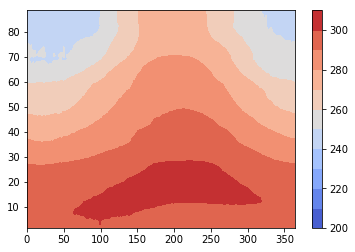

In [60]:
py.contourf(range(365), lat[ind_N], Ts[0,:,ind_N,:].mean(axis=-1), temp_range, cmap=py.cm.coolwarm); 
py.colorbar()

In [81]:
TS= (Ts[:,:-5,...].reshape((12,30,121,240))).mean(axis=1).mean(axis=-1)

In [92]:
def app(y):
    return (np.append(y,y[0,None,...],axis=0)).T

In [114]:
storm_pos_N = np.array([37.6665,   38.5977,   39.4874,   40.9187,   43.4499,   46.6441,   49.2447,   50.8982,  48.2657,   44.8451,   43.4263,   39.8141, 37.6665])
storm_pos_S = np.array([-45.6942,  -46.1395,  -46.3415,  -45.3111,  -43.8298,  -43.0015,  -43.3263,  -43.6558,  -43.4979,  -43.4074,  -43.9388, -44.9727,  -45.6942])


In [113]:
storm_pos_S.shape

(13,)

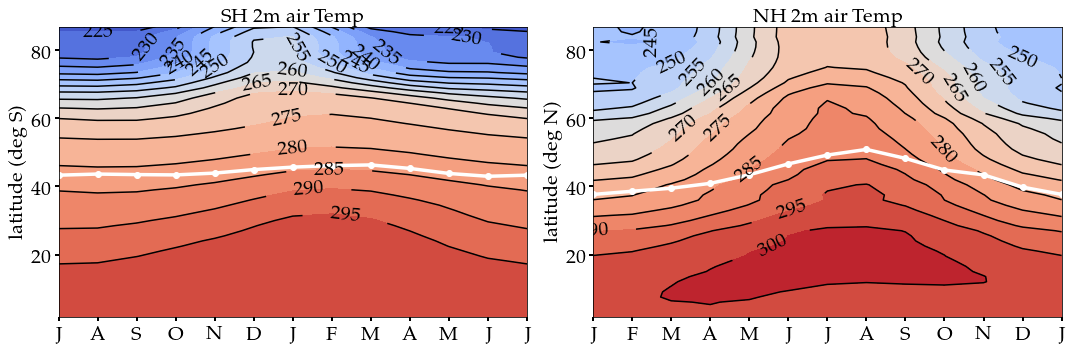

In [144]:
        ind_N=((lat>0) & (lat<88))
        ind_S=((lat>-88) & (lat<0))  
     
        py.rc('text', usetex=True)
        py.rc('font', family='serif', serif='Palatino',weight='bold')
        temp_range = np.arange(220,310,5)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']   
        py.figure(1, figsize=(15,5))
        
        d = -1
        
        lat_a = lat[ind_N]
        Isca_Ts = app(TS[:,ind_N])
        
        py.subplot(1,2,2)
        py.contourf(range(13),lat_a, Isca_Ts,     temp_range, cmap=plt.cm.coolwarm);
        c = plt.contour(range(13),lat_a, Isca_Ts,  temp_range, colors='k');
        py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20, fontsize=20)
        py.tick_params(labelsize=20,size=4,width=2)
        py.ylabel("latitude (deg N)", fontsize=20)
        py.xticks(range(13), mticks, fontsize=20)
        py.title("NH 2m air Temp", fontsize=20)
        py.plot(storm_pos_N,'wo-', lw=3.5)

                
        py.subplot(1,2,1)
        
        lat_a = -lat[ind_S]
        Isca_Ts = app(np.roll((TS[:,ind_S]), 6, axis=0))
        
        mticks = np.array(['J','F','M','A','M','J','J','A','S','O','N','D'])
        
        py.contourf(range(13),lat_a,     Isca_Ts,     temp_range, cmap=plt.cm.coolwarm);
        c = plt.contour(range(13),lat_a, Isca_Ts,  temp_range, colors='k');
        py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20, fontsize=20)
        py.tick_params(labelsize=20,size=4,width=2)
        py.ylabel("latitude (deg S)", fontsize=20)
        py.xticks(range(13), np.append(np.roll(mticks,6), np.roll(mticks,6)[0]), fontsize=20)
        py.title("SH 2m air Temp", fontsize=20)
        py.plot( np.append( (-np.roll(storm_pos_S[:-1],6)),(-np.roll(storm_pos_S[:-1],6)[0])),  'wo-', lw=3.5)
          
        py.tight_layout()
        py.savefig("ERA-NH_SH_temperature_2m.pdf")